Choice 7: Contingent Coupon Callable on three stocks (very challenging)
https://www.sec.gov/Archives/edgar/data/895421/000183988225015267/ms6936_424b2-07888.htm

Key features:
1. Multiple underlying assets.
2. Contingent coupon feature
3. Call feature also – this will require the adaptation of the LSMC method
(or equivalent) but only between call dates

Data: You will need the risk-free rate in dollars, and the dividend yield and
implied volatility for the underlying stocks – you will need three of them.
These can be obtained from Bloomberg (see below) and other sources as for
Project 1. You will also need to estimate the correlations between the stocks
– I would use a simple historical correlation estimate.

1. Call feature:
*   starts from the first redemption date and on redemption dates only.
*   payment = principle + contingent coupon
*   no payment afterwards

2. Contingent coupon 7%
*   ≥ 0.7 S_0 on obs_dates for **all** underliers.

3. Payment at maturity:
If the securities haven't been redeemed:
*   VT ≥ 0.6 S_0 for **all** underliers: principle
*   VT < 0.6 S_0 for **any** underlyings: principle * performance factor for the worst performing underlier
(performance factor = final level / initial level)



# Data Collection

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

strike_date = pd.to_datetime('2025-12-15')
pricing_date = pd.to_datetime('2025-03-10')
original_issue_date = pd.to_datetime('2025-03-13')
maturity_date = pd.to_datetime('2026-12-15')

obs_dates = [
    '2025-04-10', '2025-05-12', '2025-06-10', '2025-07-10', '2025-08-11',
    '2025-09-10', '2025-10-10', '2025-11-10', '2025-12-10', '2026-01-12',
    '2026-02-10', '2026-03-10', '2026-04-10', '2026-05-11', '2026-06-10',
    '2026-07-10', '2026-08-10', '2026-09-10', '2026-10-12', '2026-11-10',
    '2026-12-10'  # final observation date
]

coupon_dates = [
    '2025-04-15', '2025-05-15', '2025-06-13', '2025-07-15', '2025-08-14',
    '2025-09-15', '2025-10-16', '2025-11-14', '2025-12-15', '2026-01-15',
    '2026-02-13', '2026-03-13', '2026-04-15', '2026-05-14', '2026-06-15',
    '2026-07-15', '2026-08-13', '2026-09-15', '2026-10-15', '2026-11-16',
    '2026-12-15'  # maturity date
]


redemption_dates = ['2025-06-10', '2025-09-10', '2025-12-10', '2026-03-10',
    '2026-06-10', '2026-09-10'
] # corresponding obs dates of the redemption dates

# real_redemption_dates = ['2025-06-13', '2025-09-15', '2025-12-15', '2026-03-13',
#     '2026-06-15', '2026-09-15'
# ]

obs_times = [(pd.to_datetime(d) - pricing_date).days / 365.0 for d in obs_dates]
coupon_times = [(pd.to_datetime(d) - pricing_date).days / 365.0 for d in coupon_dates]
redemption_times = [(pd.to_datetime(d) - pricing_date).days / 365.0 for d in redemption_dates]
obs_coupon = [(c - o) for c,o in zip(coupon_times, obs_times)]
print(len(obs_coupon))
T = (maturity_date - pricing_date).days / 365.0
print("T:", T)

21
T: 1.7671232876712328


In [ ]:
date0 = pd.to_datetime('2025-03-10')
date1 = pd.to_datetime('2026-09-10')
date2 = pd.to_datetime('2027-03-10')
date_m = pd.to_datetime('2026-12-15')
T = (date_m-date0).days/365.0
T1 = (date1-date0).days/365.0
T2 = (date2-date0).days/365.0
discount1 = 0.943864
discount2 = 0.927449

discount_m = discount1 + (discount2 - discount1) * ((T - T1) / (T2 - T1))
r_maturity = -math.log(discount_m) / T
print(f"Interpolated discount factor at maturity: {discount_m:.6f}")
print(f"Continuously compounded zero rate at maturity: {r_maturity:.6f}")

# d_yield
q_spx = 1.327/100.0
q_ndxt = 0.511/100.0
q_rty = 1.522/100.0

# sigma at maturity ATM
sigma_70_atm = np.array([0.26909, 0.24379, 0.29079])
sigma = sigma_70_atm

# corr _2y
corr_spx_ndxt_2y = 0.858
corr_spx_rty_2y = 0.761
corr_ndxt_rty_2y = 0.624

corr_matrix_2y = np.array([
    [1.0, corr_spx_ndxt_2y, corr_spx_rty_2y],
    [corr_spx_ndxt_2y, 1.0, corr_ndxt_rty_2y],
    [corr_spx_rty_2y, corr_ndxt_rty_2y, 1.0]
])

# S0W
S0_spx = 5614.56
S0_ndxt = 9548.55
S0_rty = 2019.067

downside_threshold = 0.6
downside_threshold_spx = 0.6 * S0_spx
downside_threshold_ndxt = 0.6 * S0_ndxt
downside_threshold_rty = 0.6 * S0_rty

coupon_barrier = 0.7
coupon_barrier_spx = 0.7 * S0_spx
coupon_barrier_ndxt = 0.7 * S0_ndxt
coupon_barrier_rty = 0.7 * S0_rty

S0 = np.array([S0_spx, S0_ndxt, S0_rty])
q = np.array([q_spx, q_ndxt, q_rty])

print("S0:", S0)
print("q:", q)
print("sigma:", sigma)
print("corr_matrix:", corr_matrix_2y)
r = r_maturity
principal = 1000.0
coupon_rate = 0.07
n_paths = 500000  # Adjust based on computational resources
coupon_amount = 5.833

Interpolated discount factor at maturity: 0.935158
Continuously compounded zero rate at maturity: 0.037937
S0: [5614.56  9548.55  2019.067]
q: [0.01327 0.00511 0.01522]
sigma: [0.26909 0.24379 0.29079]
corr_matrix: [[1.    0.858 0.761]
 [0.858 1.    0.624]
 [0.761 0.624 1.   ]]


# Main Model

In [ ]:
import numpy as np
import pandas as pd
from numpy.polynomial.laguerre import lagval
from numpy.linalg import lstsq
import matplotlib.pyplot as plt


# Laguerre basis function
def laguerre_basis(x, degree):
    basis = []
    for d in range(degree + 1):
        coeffs = [0] * d + [1]
        basis.append(lagval(x, coeffs))
    return np.column_stack(basis)

all_dates = sorted(
    list(set([pricing_date.strftime('%Y-%m-%d')] + obs_dates + redemption_dates + [maturity_date.strftime('%Y-%m-%d')]))
)
times = [(pd.to_datetime(d) - pricing_date).days / 365 for d in all_dates]
time_grid = np.sort(np.unique(times))
obs_idx = [np.where(time_grid == t)[0][0] for t in obs_times]
redemption_idx = [np.where(time_grid == t)[0][0] for t in redemption_times]
print("obs_idx: ", obs_idx)
print("redemption_idx: ", redemption_idx)
print("time_grid: ", time_grid)
print("n_steps: ", len(time_grid))

np.random.seed(42)
def estimate_pv(
    n_paths, S0, q, sigma, corr_matrix, r,
    principal, coupon_amount, coupon_barrier,
    obs_dates, redemption_dates, maturity_date, pricing_date, obs_coupon
):

    # Prepare time grids
    all_dates = sorted(list(set([pricing_date.strftime('%Y-%m-%d')] + obs_dates + redemption_dates + [maturity_date.strftime('%Y-%m-%d')])))
    times = [(pd.to_datetime(d) - pricing_date).days / 365.0 for d in all_dates]
    time_grid = np.sort(np.unique(times))
    obs_times = [(pd.to_datetime(d) - pricing_date).days / 365.0 for d in obs_dates]
    redemption_times = [(pd.to_datetime(d) - pricing_date).days / 365.0 for d in redemption_dates]
    obs_idx = [np.where(time_grid == t)[0][0] for t in obs_times]
    redemption_idx = [np.where(time_grid == t)[0][0] for t in redemption_times]

    L = np.linalg.cholesky(corr_matrix)
    n_steps = len(time_grid)
    paths = np.zeros((n_paths, n_steps, len(S0)))
    paths[:, 0, :] = S0[np.newaxis, :]

    for i in range(1, n_steps):
        t = time_grid[i] - time_grid[i-1]
        Z = np.random.normal(size=(n_paths, len(S0)))
        Z_correlated = Z.dot(L.T)
        drift = (r - q - 0.5 * sigma**2) * t
        diffusion = sigma * np.sqrt(t) * Z_correlated
        paths[:, i, :] = paths[:, i-1, :] * np.exp(drift + diffusion)

    V = np.zeros((n_paths, n_steps))

    final_prices = paths[:, -1, :]
    worst_final = np.min(final_prices / S0, axis=1)
    V[:, -1] = np.where(worst_final >= 0.6, principal, principal * worst_final)

    for step in range(n_steps - 2, -1, -1):
        V[:, step] = np.exp(-r * (time_grid[step+1] - time_grid[step])) * V[:, step+1]

        if step in redemption_idx:
            X = paths[:, step, :] / S0
            L0 = laguerre_basis(X[:, 0], degree=2)
            L1 = laguerre_basis(X[:, 1], degree=2)
            L2 = laguerre_basis(X[:, 2], degree=2)
            B = np.column_stack([
                np.ones(X.shape[0]), L0, L1, L2,
                L0[:, 1:] * L1[:, 1:], L0[:, 1:] * L2[:, 1:], L1[:, 1:] * L2[:, 1:]
            ])
            cont_val = np.exp(-r * (time_grid[step+1] - time_grid[step])) * V[:, step+1]
            beta, *_ = lstsq(B, cont_val, rcond=None)
            predicted = B @ beta
            immediate_pay = np.full(X.shape[0], principal)
            exercise = immediate_pay < predicted
            if step in obs_idx:
                coupon_paid = (paths[:, step, :] >= coupon_barrier * S0).all(axis=1)
                immediate_pay += coupon_paid * coupon_amount * np.exp(-r * obs_coupon[step-1])
            ex_idx = np.where(exercise)[0]
            V[ex_idx, step] = immediate_pay[exercise]

        if step in obs_idx:
            coupon_cond = (paths[:, step, :] >= coupon_barrier * S0).all(axis=1)
            V[coupon_cond, step] += coupon_amount * np.exp(-r * obs_coupon[step-1])

    return np.mean(V[:, 0])

np.random.seed(42)
n_paths = 500000
pv = estimate_pv(
    n_paths=500000,
    S0=S0,
    q=q,
    sigma=sigma_70_atm,
    corr_matrix=corr_matrix_2y,
    r=r,
    principal=1000.0,
    coupon_amount=5.833,
    coupon_barrier=0.7,
    obs_dates=obs_dates,
    redemption_dates=redemption_dates,
    maturity_date=maturity_date,
    pricing_date=pricing_date,
    obs_coupon=obs_coupon
)

print(f"Estimated Note Value: ${pv:.2f}")

obs_idx:  [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21)]
redemption_idx:  [np.int64(3), np.int64(6), np.int64(9), np.int64(12), np.int64(15), np.int64(18)]
time_grid:  [0.         0.08493151 0.17260274 0.25205479 0.33424658 0.42191781
 0.50410959 0.58630137 0.67123288 0.75342466 0.84383562 0.92328767
 1.         1.08493151 1.16986301 1.25205479 1.33424658 1.41917808
 1.50410959 1.59178082 1.67123288 1.75342466 1.76712329]
n_steps:  23
Estimated Note Value: $956.95


# Histgram of Monte Carlo Randomness

Mean estimated PV: 957.1898
Standard deviation of PV: 0.276295


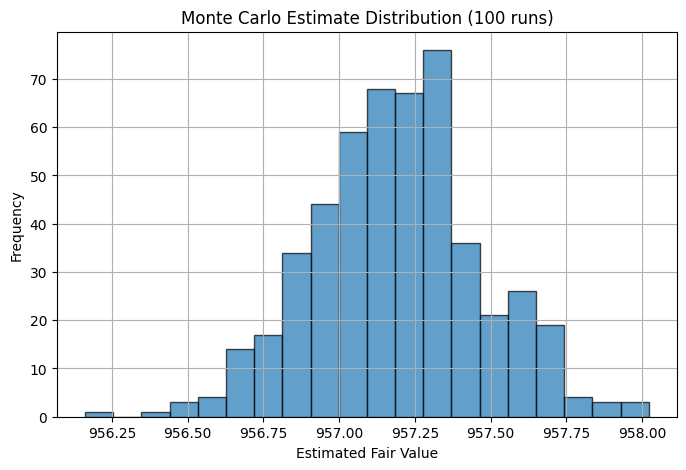

In [ ]:
n_runs = 500   # how many times to repeat full MC

results = []

for seed in range(n_runs):
    np.random.seed(seed)
    pv = estimate_pv(
    n_paths=500000,
    S0=S0,
    q=q,
    sigma=sigma_70_atm,
    corr_matrix=corr_matrix_2y,
    r=r,
    principal=1000.0,
    coupon_amount=5.833,
    coupon_barrier=0.7,
    obs_dates=obs_dates,
    redemption_dates=redemption_dates,
    maturity_date=maturity_date,
    pricing_date=pricing_date,
    obs_coupon=obs_coupon
)
    results.append(pv)

results = np.array(results)
mean_estimate = np.mean(results)
std_estimate = np.std(results)

print(f"Mean estimated PV: {mean_estimate:.4f}")
print(f"Standard deviation of PV: {std_estimate:.6f}")

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(results, bins=20, edgecolor='black', alpha=0.7)
plt.title('Monte Carlo Estimate Distribution (500 runs)')
plt.xlabel('Estimated Fair Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
1.96*0.276295

0.5415382

# Vol Analysis

In [ ]:
import numpy as np
sigma_55_atm = np.array([0.31961, 0.24379, 0.33718])
sigma_60_atm = np.array([0.30024, 0.24379, 0.32121])
sigma_70_atm = np.array([0.26909, 0.24379, 0.29079])
sigma_85_atm = np.array([0.22785, 0.24379, 0.25412])
sigma_100_atm = np.array([0.19344, 0.24379, 0.23453])
sigma_110_atm = np.array([0.17082, 0.24379, 0.22384])

valuation_results = {}
sigma_dict = {
    "sigma_55_atm": sigma_55_atm,
    "sigma_60_atm": sigma_60_atm,
    "sigma_70_atm": sigma_70_atm,
    "sigma_85_atm": sigma_85_atm,
    "sigma_100_atm": sigma_100_atm,
    "sigma_110_atm": sigma_110_atm,
}

for name, sigma_set in sigma_dict.items():
    np.random.seed(42)
    pv = estimate_pv(
        n_paths=500000,
        S0=S0,
        q=q,
        sigma=sigma_set,
        corr_matrix=corr_matrix_2y,
        r=r,
        principal=principal,
        coupon_amount=coupon_amount,
        coupon_barrier=coupon_barrier,
        obs_dates=obs_dates,
        redemption_dates=redemption_dates,
        maturity_date=maturity_date,
        pricing_date=pricing_date,
        obs_coupon=obs_coupon
    )
    valuation_results[name] = round(pv, 2)

# Display results
valuation_results

{'sigma_55_atm': np.float64(921.45),
 'sigma_60_atm': np.float64(934.85),
 'sigma_70_atm': np.float64(956.95),
 'sigma_85_atm': np.float64(979.33),
 'sigma_100_atm': np.float64(988.88),
 'sigma_110_atm': np.float64(992.57)}

# Correlation Analysis

In [ ]:
# corr _2y
corr_spx_ndxt_2y = 0.858
corr_spx_rty_2y = 0.761
corr_ndxt_rty_2y = 0.624

# corr_1.5y
corr_spx_ndxt_1_5y = 0.868
corr_spx_rty_1_5y = 0.823
corr_ndxt_rty_1_5y = 0.689

# corr _1y
corr_spx_ndxt_1y = 0.884
corr_spx_rty_1y = 0.777
corr_ndxt_rty_1y = 0.665

corr_matrix_2y = np.array([
    [1.0, corr_spx_ndxt_2y, corr_spx_rty_2y],
    [corr_spx_ndxt_2y, 1.0, corr_ndxt_rty_2y],
    [corr_spx_rty_2y, corr_ndxt_rty_2y, 1.0]
])

corr_matrix_1_5y = np.array([
    [1.0, corr_spx_ndxt_1_5y, corr_spx_rty_1_5y],
    [corr_spx_ndxt_1_5y, 1.0, corr_ndxt_rty_1_5y],
    [corr_spx_rty_1_5y, corr_ndxt_rty_1_5y, 1.0]
])

corr_matrix_1y = np.array([
    [1.0, corr_spx_ndxt_1y, corr_spx_rty_1y],
    [corr_spx_ndxt_1y, 1.0, corr_ndxt_rty_1y],
    [corr_spx_rty_1y, corr_ndxt_rty_1y, 1.0]
])
sigma = sigma_70_atm---
valuation_results = {}
corr_dict = {
    "corr_1y": corr_matrix_1y,
    "corr_1_5y": corr_matrix_1_5y,
    "corr_2y": corr_matrix_2y
}

for name, corr_set in corr_dict.items():
    np.random.seed(42)
    pv = estimate_pv(
        n_paths=500000,
        S0=S0,
        q=q,
        sigma=sigma,
        corr_matrix=corr_set,
        r=r,
        principal=principal,
        coupon_amount=coupon_amount,
        coupon_barrier=coupon_barrier,
        obs_dates=obs_dates,
        redemption_dates=redemption_dates,
        maturity_date=maturity_date,
        pricing_date=pricing_date,
        obs_coupon=obs_coupon
    )
    valuation_results[name] = round(pv, 2)

valuation_results

{'corr_1y': np.float64(958.72),
 'corr_1_5y': np.float64(960.43),
 'corr_2y': np.float64(956.95)}

# Sensitivity analysis-- Overall


Base PV  : 956.9498


--- Sensitivity Table (per unit change) ---
          Metric  Sensitivity
       Delta_SPX     0.000000
      Delta_NDXT     0.000000
       Delta_RTY     0.000000
        Vega_SPX  -267.642423
       Vega_NDXT  -187.042049
        Vega_RTY  -419.782247
             Rho  -488.901012
Corr_sensitivity   111.656556


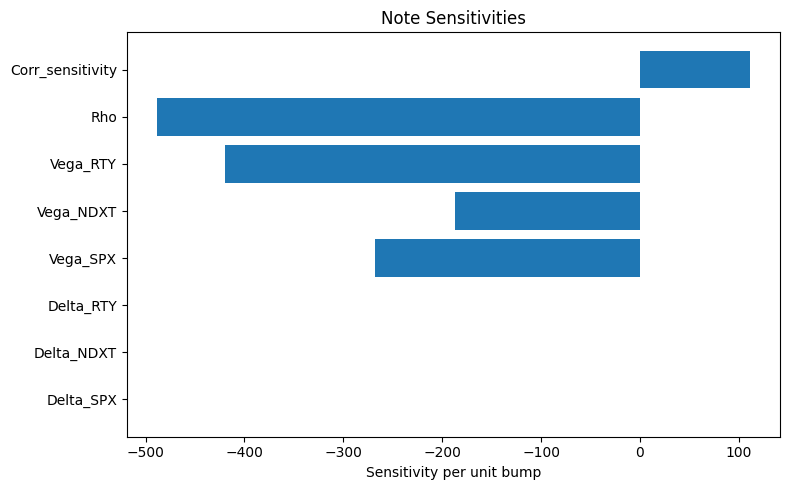

In [ ]:
import numpy as np
import pandas as pd

N_SENS    = 500_000
SHIFT_S0   = 0.01
SHIFT_SIG  = 0.01
SHIFT_R    = 0.0025
SHIFT_CORR = 0.05

def pv_wrapper(
    S0, sigma, corr_matrix, r
):
    return estimate_pv(
        n_paths=N_SENS,
        S0=S0,
        q=q,
        sigma=sigma,
        corr_matrix=corr_matrix,
        r=r,
        principal=principal,
        coupon_amount=coupon_amount,
        coupon_barrier=coupon_barrier,
        obs_dates=obs_dates,
        redemption_dates=redemption_dates,
        maturity_date=maturity_date,
        pricing_date=pricing_date,
        obs_coupon=obs_coupon
    )

np.random.seed(42)
base_pv = pv_wrapper(S0=S0, sigma=sigma_70_atm, corr_matrix=corr_matrix_2y, r=r)
print(f"\nBase PV  : {base_pv:.4f}\n")

results = []

# DELTAS
orig_S0 = S0.copy()
for i, name in enumerate(['SPX', 'NDXT', 'RTY']):
    S0[i] = orig_S0[i] * (1 + SHIFT_S0)
    np.random.seed(42)
    pv_up = pv_wrapper(S0=S0, sigma=sigma_70_atm, corr_matrix=corr_matrix_2y, r=r)
    delta = (pv_up - base_pv) / (orig_S0[i] * SHIFT_S0)
    results.append((f'Delta_{name}', delta))
    S0[i] = orig_S0[i]  # reset

# VEGAS
orig_sigma = sigma_70_atm.copy()
for i, name in enumerate(['SPX', 'NDXT', 'RTY']):
    sigma_70_atm[i] = orig_sigma[i] * (1 + SHIFT_SIG)
    np.random.seed(42)
    pv_up = pv_wrapper(S0=S0, sigma=sigma_70_atm, corr_matrix=corr_matrix_2y, r=r)
    vega = (pv_up - base_pv) / (orig_sigma[i] * SHIFT_SIG)
    results.append((f'Vega_{name}', vega))
    sigma_70_atm[i] = orig_sigma[i]  # reset

# RHO
orig_r = r
r = orig_r + SHIFT_R
np.random.seed(42)
pv_up = pv_wrapper(S0=S0, sigma=sigma_70_atm, corr_matrix=corr_matrix_2y, r=r)
rho = (pv_up - base_pv) / SHIFT_R
results.append(('Rho', rho))
r = orig_r  # reset

# Correlation sensitivity
orig_corr = corr_matrix_2y.copy()
bump = np.full(orig_corr.shape, SHIFT_CORR)
np.fill_diagonal(bump, 0.0)
corr_matrix_2y[:] = np.clip(orig_corr + bump, -0.99, 0.99)
np.random.seed(42)
pv_up = pv_wrapper(S0=S0, sigma=sigma_70_atm, corr_matrix=corr_matrix_2y, r=r)
corr_sen = (pv_up - base_pv) / SHIFT_CORR
results.append(('Corr_sensitivity', corr_sen))
corr_matrix_2y[:] = orig_corr  # reset

sens_df = pd.DataFrame(results, columns=['Metric', 'Sensitivity'])
print("\n--- Sensitivity Table (per unit change) ---")
print(sens_df.to_string(index=False))

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(sens_df['Metric'], sens_df['Sensitivity'])
plt.xlabel('Sensitivity per unit bump')
plt.title('Note Sensitivities')
plt.tight_layout()
plt.show()

## Antithetic Variate

In [ ]:
def estimate_pv_antithetic(
    n_paths, S0, q, sigma, corr_matrix, r,
    principal, coupon_amount, coupon_barrier,
    obs_dates, redemption_dates, maturity_date, pricing_date
):
    np.random.seed(42)

    # Prepare time grids
    all_dates = sorted(list(set([pricing_date.strftime('%Y-%m-%d')] + obs_dates + redemption_dates + [maturity_date.strftime('%Y-%m-%d')])))
    times = [(pd.to_datetime(d) - pricing_date).days / 365.0 for d in all_dates]
    time_grid = np.sort(np.unique(times))
    obs_times = [(pd.to_datetime(d) - pricing_date).days / 365.0 for d in obs_dates]
    redemption_times = [(pd.to_datetime(d) - pricing_date).days / 365.0 for d in redemption_dates]
    obs_idx = [np.where(time_grid == t)[0][0] for t in obs_times]
    redemption_idx = [np.where(time_grid == t)[0][0] for t in redemption_times]

    L = np.linalg.cholesky(corr_matrix)
    n_steps = len(time_grid)
    n_paths_half = n_paths // 2
    paths = np.zeros((n_paths, n_steps, len(S0)))
    paths[:, 0, :] = S0[np.newaxis, :]

    for i in range(1, n_steps):
        t = time_grid[i] - time_grid[i-1]
        Z = np.random.normal(size=(n_paths_half, len(S0)))
        Z_antithetic = -Z
        Z_full = np.vstack((Z, Z_antithetic))
        Z_correlated = Z_full.dot(L.T)
        drift = (r - q - 0.5 * sigma**2) * t
        diffusion = sigma * np.sqrt(t) * Z_correlated
        paths[:, i, :] = paths[:, i-1, :] * np.exp(drift + diffusion)

    V = np.zeros((n_paths, n_steps))
    called = np.zeros(n_paths, dtype=bool)

    final_prices = paths[:, -1, :]
    worst_final = np.min(final_prices / S0, axis=1)
    V[:, -1] = np.where(worst_final >= 0.6, principal, principal * worst_final)

    for step in range(n_steps - 2, -1, -1):
        V[:, step] = np.exp(-r * (time_grid[step+1] - time_grid[step])) * V[:, step+1]

        if step in redemption_idx:
            eligible = (paths[:, step, :] >= S0).all(axis=1) & (~called)
            X = paths[eligible, step, :] / S0
            L0 = laguerre_basis(X[:, 0], degree=2)
            L1 = laguerre_basis(X[:, 1], degree=2)
            L2 = laguerre_basis(X[:, 2], degree=2)
            B = np.column_stack([
                np.ones(X.shape[0]), L0, L1, L2,
                L0[:, 1:] * L1[:, 1:], L0[:, 1:] * L2[:, 1:], L1[:, 1:] * L2[:, 1:]
            ])
            cont_val = np.exp(-r * (time_grid[step+1] - time_grid[step])) * V[eligible, step+1]
            beta, *_ = lstsq(B, cont_val, rcond=None)
            predicted = B @ beta
            immediate_pay = np.full(X.shape[0], principal)
            exercise = immediate_pay < predicted
            if step in obs_idx:
                coupon_paid = (paths[eligible, step, :] >= coupon_barrier * S0).all(axis=1)
                immediate_pay += coupon_paid * coupon_amount
            ex_idx = np.where(eligible)[0][exercise]
            V[ex_idx, step] = immediate_pay[exercise]
            called[ex_idx] = True

        if step in obs_idx:
            coupon_cond = (paths[:, step, :] >= coupon_barrier * S0).all(axis=1)
            V[coupon_cond & ~called, step] += coupon_amount

    return np.mean(V[:, 0])


n_paths = 1000000
pv_antithetic = estimate_pv_antithetic(
    n_paths=1000000,
    S0=S0,
    q=q,
    sigma=sigma,
    corr_matrix=corr_matrix_2y,
    r=r,
    principal=1000.0,
    coupon_amount=5.833,
    coupon_barrier=0.7,
    obs_dates=obs_dates,
    redemption_dates=redemption_dates,
    maturity_date=maturity_date,
    pricing_date=pricing_date
)

print(f"Estimated Note Value: ${pv_antithetic:.2f}")

Estimated Note Value: $953.48
